In [18]:
! git clone https://github.com/zry3fr/scratchpad
%run ./scratchpad/get_data.py

/bin/bash: line 1: your: No such file or directory
Download complete
Extracting data files...
Data extracted


# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.

1.

In [3]:
import pandas as pd

In [21]:
airbnb = pd.read_csv(
    '/content/data/airbnb_NYC.csv',
    encoding='latin1'
)
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [24]:
price_clean = (
    airbnb['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
)

price_numeric = pd.to_numeric(price_clean, errors='coerce')

I converted everything in the price column into strings to ensure consistent datatypes. Then, I removed the commas which are just thousand separators and are not meaningful numerically. Lastly, I converted the values numeric using 'to_numeric' while also making invalid values appear as 'NaN'.

In [31]:
airbnb['Price']

,Price
0,145
1,37
2,28
3,199
4,549
...,...
30473,300
30474,125
30475,80
30476,35


After cleaning, there are 0 missing values. All entries under the price column are valid numbers.

2.

In [32]:
import numpy as np

In [33]:
force = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')
force.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [34]:
orig_counts = force['subject_injury'].value_counts(dropna=False)
orig_counts

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [35]:
missing_prop = force['subject_injury'].isna().mean()
missing_prop

np.float64(0.7619342359767892)

In [38]:
force['subject_injury_clean'] = (
    force['subject_injury']
    .astype('string')
    .str.strip()
    .str.lower()
    .map({
        'yes': 'Yes',
        'y': 'Yes',
        'true': 'Yes',
        'injured': 'Yes',
        'no': 'No',
        'n': 'No',
        'false': 'No',
        'not injured': 'No'
    })
)

About 76.2% of all injury outcomes are missing.

In [39]:
crosstab_before = pd.crosstab(force['force_type'], force['subject_injury_clean'], dropna=False)
crosstab_before

subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


A key pattern is that some force types, such as 'Maximal Restraint Technique', have almost entirely missing injury information.  

In [40]:
force['subject_injury_clean'] = force['subject_injury_clean'].fillna('Missing')

In [41]:
crosstab_after = pd.crosstab(force['force_type'], force['subject_injury_clean'])
crosstab_after

subject_injury_clean,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


3.

In [42]:
metabric = pd.read_csv('/content/data/metabric.csv')
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [43]:
metabric['Overall Survival Status'].value_counts(dropna=False)

,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


In [45]:
metabric['overall_survival_dummy'] = (
    metabric['Overall Survival Status']
    .str.strip()
    .str.lower()
    .map({
        'deceased': 0,
        'living': 1
    })
)

In [46]:
metabric[['Overall Survival Status', 'overall_survival_dummy']].head()

,Overall Survival Status,overall_survival_dummy
0,0:LIVING,NaN
1,1:DECEASED,NaN
2,0:LIVING,NaN
3,1:DECEASED,NaN
4,1:DECEASED,NaN


4.

In [47]:
missing_count = airbnb['Review Scores Rating'].isna().sum()
missing_count

np.int64(8323)

There are 8323 missing values.

In [48]:
median_rating = airbnb['Review Scores Rating'].median()
median_rating

94.0

In [49]:
airbnb['review_score_imputed'] = airbnb['Review Scores Rating'].fillna(median_rating)

Median imputation can negatively affect analysis, because the missing reviews are not random. Listings with no reviews might indicate new, inactive, or lower quality ratings. Therefore, assigning thme a higher median score, such as 94, overstates their quality.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.


1.

In [53]:
shark_attacks = pd.read_excel('/GSAF5.xls')
shark_attacks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using 'read_excel' works because the format is an excel file instead of a csv file, which is why 'read_csv' does not work.

2.

In [54]:
shark_attacks = shark_attacks.dropna(axis=1, how='all')

3.

Each observation or row represents a single shark incident. Understanding this matters for cleaning so I do not accidentally aggregate two incidents into one. Additionally, it helps me understand that I should not treat columns as separate observations. Cleaning should include preserving one row per shark incident.

4.

In [55]:
shark_attacks['Year_clean'] = pd.to_numeric(shark_attacks['Year'], errors='coerce')

In [56]:
shark_attacks['Year_clean'].describe()

,Year_clean
count,7068.000000
mean,1935.953311
std,270.740135
min,0.000000
25%,1948.000000
50%,1986.000000
75%,2010.000000
max,2026.000000


The dataset includes shark attack incidents from as early as the 1940s to more recent years such as 2026.

In [57]:
shark_attacks_modern = shark_attacks[shark_attacks['Year_clean'] >= 1940]
shark_attacks_modern

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Year_clean
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,1940,1940.0,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0,NaN,NaN,1940.0
5532,1940,1940.0,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0,NaN,NaN,1940.0
5533,1940,1940.0,Invalid,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0,NaN,NaN,1940.0
5534,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0,NaN,NaN,1940.0


<Axes: xlabel='Year_clean'>

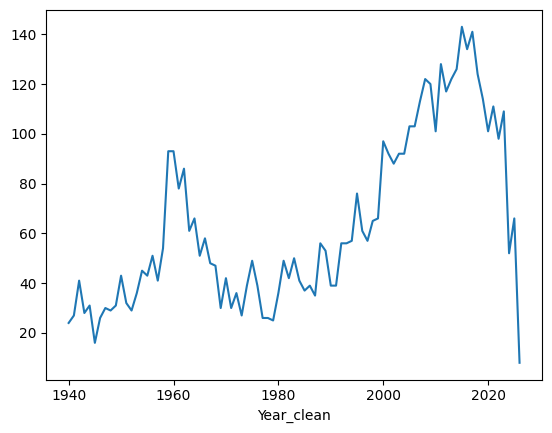

In [58]:
attacks_by_year = shark_attacks_modern['Year_clean'].value_counts().sort_index()
attacks_by_year.plot(kind='line')

Since 2020, shark attacks seem to be declining steeply. However, before that, since around 1980, shark attacks seemed to be increasing overtime until around 2020.

5.

In [59]:
shark_attacks['Age_clean'] = pd.to_numeric(shark_attacks['Age'], errors='coerce')

In [60]:
import matplotlib.pyplot as plt

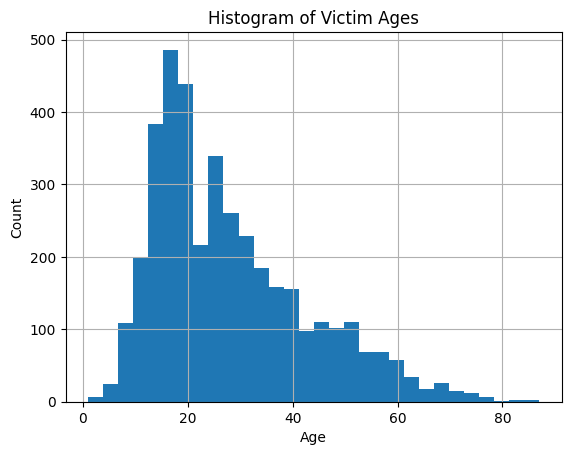

In [61]:
shark_attacks['Age_clean'].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Victim Ages")
plt.show()

6.

In [62]:
shark_attacks['Type_clean'] = (
    shark_attacks['Type']
    .str.strip()
    .str.lower()
    .map({
        'provoked': 'Provoked',
        'unprovoked': 'Unprovoked'
    })
    .fillna('Unknown')
)

In [63]:
shark_attacks['Type_clean'].value_counts(normalize=True)

,proportion
Type_clean,
Unprovoked,0.738614
Unknown,0.170297
Provoked,0.091089


About 74% of attacks are unprovoked.

7.

In [65]:
shark_attacks['Fatal_clean'] = (
    shark_attacks['Fatal Y/N']
    .str.strip()
    .str.upper()
    .map({'Y': 'Y', 'N': 'N'})
    .fillna('Unknown')
)

8.

In [66]:
cross = pd.crosstab(shark_attacks['Type_clean'], shark_attacks['Fatal_clean'], normalize='index')
cross

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742244,0.015128,0.242627


The attack is more likely to be fatal when unprovoked. This was actually surprising to me as I thought provoked attacks would be more likely to be fatal, because the shark is more likely to be angry.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.



1. This paper is focused on data tidying and develops a framework that makes cleaning data easier and more effective.

2. The tiny data standard intends to make data cleaning and analysis easier. Using this structure simplifies data manipulation by ensuring consistency within the data values and enhancing readability for comprehending the dataset.

3.
- **"Like families, tidy datasets are all alike but every messy dataset is messy in its own way."**
This means that tidy datasets always follow the same consistent strict rules. For example, each variable is a column and each observation is a row. Messy datasets are unstructured in unique ways and can often be disorganized. For example, scattered variables and inconsistent formatting.
- **"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."** This means that it is easy to understant instantly when looking at a dataset what the rows and column are. However, because data structure is relative, it is difficult to universally define terms that apply to all data types.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?